In [37]:
import scipy as sc
import scipy.optimize
import numpy as np
from matplotlib import pyplot as plt


In [38]:
class LinearModel:

    def __init__(self, A=np.empty([0, 0]), b=np.empty([0, 0]), c=np.empty([0, 0]), minmax="MAX"):
        self.A = A
        self.b = b
        self.c = c
        self.x = [float(0)] * len(c)
        self.minmax = minmax
        self.printIter = True
        self.optimalValue = None
        self.transform = False

    def addA(self, A):
        self.A = A

    def addB(self, b):
        self.b = b

    def addC(self, c):
        self.c = c
        self.transform = False

    def setObj(self, minmax):
        if minmax == "MIN" or minmax == "MAX":
            self.minmax = minmax
        else:
            print("Invalid objective.")
        self.transform = False

    def setPrintIter(self, printIter):
        self.printIter = printIter

    def printSoln(self):
        print("Coefficients: ")
        print(self.x)
        print("Optimal value: ")
        print(self.optimalValue)

    def printTableau(self, tableau):

        print("ind \t\t", end="")
        for j in range(0, len(c)):
            print("x_" + str(j), end="\t")
        for j in range(0, (len(tableau[0]) - len(c) - 2)):
            print("s_" + str(j), end="\t")

        print()
        for j in range(0, len(tableau)):
            for i in range(0, len(tableau[0])):
                if (not np.isnan(tableau[j, i])):
                    if (i == 0):
                        print(int(tableau[j, i]), end="\t")
                    else:
                        print(round(tableau[j, i], 2), end="\t")
                else:
                    print(end="\t")
            print()

    def getTableau(self):
        # construct starting tableau

        if (self.minmax == "MIN" and self.transform == False):
            self.c[0:len(c)] = -1 * self.c[0:len(c)]
            self.transform = True

        t1 = np.array([None, 0])
        numVar = len(self.c)
        numSlack = len(self.A)

        t1 = np.hstack(([None], [0], self.c, [0] * numSlack))

        basis = np.array([0] * numSlack)

        for i in range(0, len(basis)):
            basis[i] = numVar + i

        A = self.A

        if (not ((numSlack + numVar) == len(self.A[0]))):
            B = np.identity(numSlack)
            A = np.hstack((self.A, B))

        t2 = np.hstack((np.transpose([basis]), np.transpose([self.b]), A))

        tableau = np.vstack((t1, t2))

        tableau = np.array(tableau, dtype='float')

        return tableau

    def optimize(self):

        if (self.minmax == "MIN" and self.transform == False):
            for i in range(len(self.c)):
                self.c[i] = -1 * self.c[i]
                transform = True

        tableau = self.getTableau()

        if (self.printIter == True):
            print("Starting Tableau:")
            self.printTableau(tableau)

        # assume initial basis is not optimal
        optimal = False

        # keep track of iterations for display
        iter = 1

        while (True):

            if (self.printIter == True):
                print("----------------------------------")
                print("Iteration :", iter)
                self.printTableau(tableau)

            if (self.minmax == "MAX"):
                for profit in tableau[0, 2:]:
                    if profit > 0:
                        optimal = False
                        break
                    optimal = True
            else:
                for cost in tableau[0, 2:]:
                    if cost < 0:
                        optimal = False
                        break
                    optimal = True

            # if all directions result in decreased profit or increased cost
            if optimal == True:
                break

            # nth variable enters basis, account for tableau indexing
            if (self.minmax == "MAX"):
                n = tableau[0, 2:].tolist().index(np.amax(tableau[0, 2:])) + 2
            else:
                n = tableau[0, 2:].tolist().index(np.amin(tableau[0, 2:])) + 2

            # minimum ratio test, rth variable leaves basis
            minimum = 99999
            r = -1

            for i in range(1, len(tableau)):
                if (tableau[i, n] > 0):
                    val = tableau[i, 1] / tableau[i, n]
                    if val < minimum:
                        minimum = val
                        r = i

            pivot = tableau[r, n]

            print("Pivot Column:", n)
            print("Pivot Row:", r)
            print("Pivot Element: ", pivot)

            # perform row operations
            # divide the pivot row with the pivot element
            tableau[r, 1:] = tableau[r, 1:] / pivot

            # pivot other rows
            for i in range(0, len(tableau)):
                if i != r:
                    mult = tableau[i, n] / tableau[r, n]
                    tableau[i, 1:] = tableau[i, 1:] - mult * tableau[r, 1:]

                    # new basic variable
            tableau[r, 0] = n - 2

            iter += 1

        if (self.printIter == True):
            print("----------------------------------")
            print("Final Tableau reached in", iter, "iterations")
            self.printTableau(tableau)
        else:
            print("Solved")

        self.x = np.array([0] * len(c), dtype=float)
        # save coefficients
        for key in range(1, (len(tableau))):
            if (tableau[key, 0] < len(c)):
                self.x[int(tableau[key, 0])] = tableau[key, 1]

        self.optimalValue = -1 * tableau[0, 1]


A =
 [[ 9  8  3]
 [10  7  5]] 

b =
 [338 300] 

c =
 [8 6 3] 


Starting Tableau:
ind 		x_0	x_1	x_2	s_0	s_1	
	0.0	8.0	6.0	3.0	0.0	0.0	
3	338.0	9.0	8.0	3.0	1.0	0.0	
4	300.0	10.0	7.0	5.0	0.0	1.0	
----------------------------------
Iteration : 1
ind 		x_0	x_1	x_2	s_0	s_1	
	0.0	8.0	6.0	3.0	0.0	0.0	
3	338.0	9.0	8.0	3.0	1.0	0.0	
4	300.0	10.0	7.0	5.0	0.0	1.0	
Pivot Column: 2
Pivot Row: 2
Pivot Element:  10.0
----------------------------------
Iteration : 2
ind 		x_0	x_1	x_2	s_0	s_1	
	-240.0	0.0	0.4	-1.0	0.0	-0.8	
3	68.0	0.0	1.7	-1.5	1.0	-0.9	
0	30.0	1.0	0.7	0.5	0.0	0.1	
Pivot Column: 3
Pivot Row: 1
Pivot Element:  1.7000000000000002
----------------------------------
Iteration : 3
ind 		x_0	x_1	x_2	s_0	s_1	
	-256.0	0.0	0.0	-0.65	-0.24	-0.59	
1	40.0	0.0	1.0	-0.88	0.59	-0.53	
0	2.0	1.0	0.0	1.12	-0.41	0.47	
----------------------------------
Final Tableau reached in 3 iterations
ind 		x_0	x_1	x_2	s_0	s_1	
	-256.0	0.0	0.0	-0.65	-0.24	-0.59	
1	40.0	0.0	1.0	-0.88	0.59	-0.53	
0	2.0	1.0	0.0	1.12	-0.

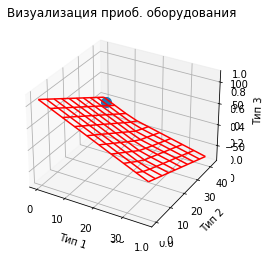

Финальный ответ:
Тип 1 машин: 2
Тип 2 машин: 40
Тип 3 машин: 0
Максимальная производительность: 256


In [39]:
model1 = LinearModel()

SPACE = 338
MONEY = 300
a_money = 10
b_money = 7
c_money = 5
a_space = 9
b_space = 8
c_space = 3
a_prod = 8
b_prod = 6
c_prod = 3
a_max = int(max(SPACE / a_space, MONEY / a_money))
b_max = int(max(SPACE / b_space, MONEY / b_money))
c_max = int(max(SPACE / c_space, MONEY / c_money))

A = np.array([[a_space, b_space, c_space],
              [a_money, b_money, c_money]])
b = np.array([SPACE, MONEY])
c = np.array([a_prod, b_prod, c_prod])

model1.addA(A)
model1.addB(b)
model1.addC(c)

print("A =\n", A, "\n")
print("b =\n", b, "\n")
print("c =\n", c, "\n\n")
model1.optimize()
print("\n")
model1.printSoln()

# create 3d axes
fig = plt.figure()
ax = plt.axes(projection='3d')


# function for Z values
def f(x, y):
    # zmax = max((MONEY-a_money*x-b_money*y)/c_money, (SPACE-a_space*x-b_space*y)/c_space)
    zmax = [[max([(MONEY - a_money * x[i][j] - b_money * y[i][j]) / c_money,
                  (SPACE - a_space * x[i][j] - b_space * y[i][j]) / c_space]) for i in range(len(x))] for j in
            range(len(y))]
    zmax = np.array(zmax)
    return zmax


# x and y values
x = np.linspace(0, a_max, 10)
y = np.linspace(0, b_max, 10)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='red')
plt.title("Визуализация приоб. оборудования")
ax.set_xlabel('Тип 1')
ax.set_ylabel('Тип 2')
ax.set_zlabel('Тип 3')
a_best = round(model1.x[0])
b_best = round(model1.x[1])
c_best = round(model1.x[2])
ax.scatter(a_best, b_best, c_best, s=100)

plt.show()

print("Финальный ответ:")
print(f"Тип 1 машин: %d" % a_best)
print(f"Тип 2 машин: %d" % b_best)
print(f"Тип 3 машин: %d" % c_best)
print(f"Максимальная производительность: %d" % (a_best*a_prod+b_best*b_prod+c_best*c_prod))

In [40]:
print("Проверка")

SPACE = 338
MONEY = 300
a_money = 10
b_money = 7
c_money = 5
a_space = 9
b_space = 8
c_space = 3
a_prod = 8
b_prod = 6
c_prod = 3
a_max = int(max(SPACE/a_space, MONEY/a_money))
b_max = int(max(SPACE/b_space, MONEY/b_money))
c_max = int(max(SPACE/c_space, MONEY/c_money))
obj = [-a_prod, -b_prod, -c_prod]  # a, b, c
#      ─┬  ─┬  ─┬
#       │   │   └─┤ Коэффициент для c
#       │   └─────┤ Коэффициент для b
#       └─────────┤ Коэффициент для a

lhs_ineq = [[a_space, b_space, c_space],  # левая сторона ограничение площадь неравенства
            [a_money, b_money, c_money]]  # левая сторона ограничение деньги неравенства

rhs_ineq = [SPACE,  # правая сторона ограничение площадь неравенства
            MONEY]  # правая сторона ограничение деньги неравенства

lhs_eq = [[0, 0, 0]]  # левая сторона зеленого равенства
rhs_eq = [0]  # правая сторона зеленого равенства

bnd = [(0, a_max),  # Границы a
       (0, b_max),  # Границы b
       (0, c_max)]  # Границы c

opt = scipy.optimize.linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
                             A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd,
                             method="simplex", )
print("Финальный ответ:")
print(f"Тип 1 машин: %d" % round(opt.x[0]))
print(f"Тип 2 машин: %d" % round(opt.x[1]))
print(f"Тип 3 машин: %d" % round(opt.x[2]))
print(f"Максимальная производительность: %d" % (opt.x[0]*a_prod+opt.x[1]*b_prod+opt.x[2]*c_prod))

print("Конец проверки")

Проверка
Финальный ответ:
Тип 1 машин: 2
Тип 2 машин: 40
Тип 3 машин: 0
Максимальная производительность: 256
Конец проверки
